# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on Ridge and Lasso regression!

## Objectives

You will be able to:

- Use Lasso and ridge regression in Python
- Compare Lasso and Ridge with standard regression

## Housing Prices Data

Let's look at yet another house pricing data set.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [5]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We'll make a first selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`), then replace missing inputs by the median per feature.

Store the target in `y`.

In [32]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# remove "object"-type features and SalesPrice from `X`
features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64] and col != 'SalePrice']
x = df[features]
x.shape
pd.isna(x).sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

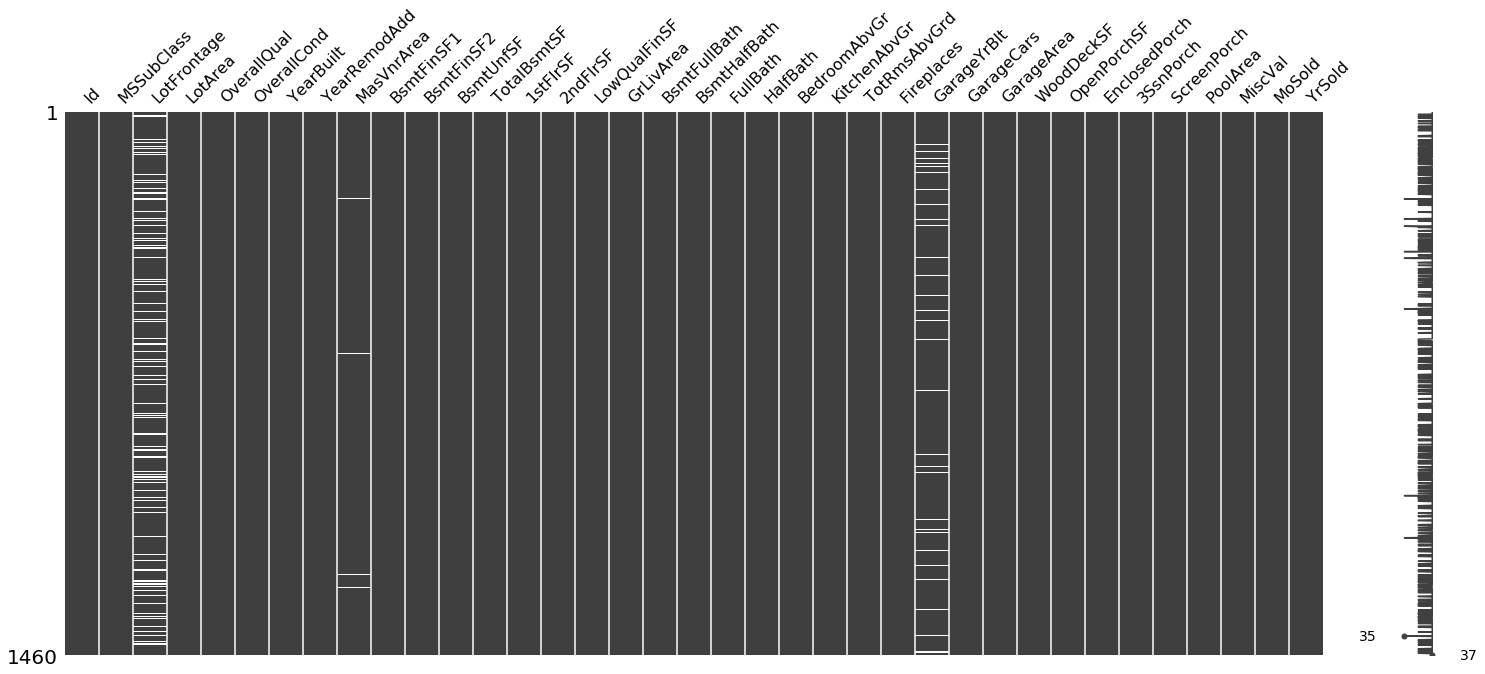

In [33]:
import missingno as msno #as a sanity check of if I can run simple things correctly. It is all about learning!
msno.matrix(x)

In [34]:
for col in x:
    med = x[col].median()
    x[col].fillna(value = med, inplace = True)

y = df.SalePrice

Look at the information of `X` again

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [41]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
x_train, x_test, y_train, y_test = train_test_split(x,y)
# Split in train and test
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print('Training R2:', lin_reg.score(x_train,y_train))
print('Testing R2:', lin_reg.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(x_test)))

# Fit the model and print R2 and MSE for train and test


Training R2: 0.7980879320709668
Testing R2: 0.8550779766605402
Training MSE: 1313017817.7867982
Testing MSE: 828691196.2493215


## Normalize your data

We haven't normalized our data, let's create a new model that uses `preprocessing.scale` to scale our predictors!

In [49]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
# Scale the data and perform train test split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
type(x_scaled)

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


numpy.ndarray

Perform the same linear regression on this data and print out R-squared and MSE.

In [46]:
# Your code here
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print('Training R2:', lin_reg.score(x_train,y_train))
print('Testing R2:', lin_reg.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(x_test)))

Training R2: 0.8494888403294933
Testing R2: 0.5463179218955161
Training MSE: 1022575145.4377987
Testing MSE: 2177197355.955865


## Include dummy variables

We haven't included dummy variables so far: let's use our "object" variables again and create dummies

In [48]:
# Create X_cat which contains only the categorical variables
features_cat = [col for col in df.columns if df[col].dtype in [np.object]]
x_cat = df[features_cat]

x_cat.shape

(1460, 43)

In [50]:
# Make dummies
x_cat = pd.get_dummies(x_cat)

x_all = pd.concat([pd.DataFrame(x_scaled),x_cat], axis=1)

Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [ ]:
# Your code here

Perform the same linear regression on this data and print out R-squared and MSE.

In [51]:
# Your code here
x_train, x_test, y_train, y_test = train_test_split(x_all, y)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print('Training R2:', lin_reg.score(x_train,y_train))
print('Testing R2:', lin_reg.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(x_test)))

Training R2: 0.9453893072492522
Testing R2: -1.3062127886795768e+19
Training MSE: 342001872.3059361
Testing MSE: 8.41138596473213e+28


Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far far off. Similarly, the scale of the Testing MSE is orders of magnitude higher then that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [52]:
# Your code here
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(x_train, y_train)

print('Training R2:', lasso.score(x_train,y_train))
print('Testing R2:', lasso.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(x_test)))

Training R2: 0.942953104849046
Testing R2: 0.8657720754238573
Training MSE: 357258697.3015375
Testing MSE: 864363670.7892103


C:\Users\J\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


With a higher regularization parameter (alpha = 10)

In [53]:
# Your code here
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)

print('Training R2:', lasso.score(x_train,y_train))
print('Testing R2:', lasso.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(x_test)))

Training R2: 0.9409593085844239
Testing R2: 0.8785605302878661
Training MSE: 369744934.3578871
Testing MSE: 782012134.5877676


C:\Users\J\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Ridge

With default parameter (alpha = 1)

In [54]:
# Your code here
ridge = Ridge()
ridge.fit(x_train, y_train)

print('Training R2:', ridge.score(x_train,y_train))
print('Testing R2:', ridge.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(x_test)))

Training R2: 0.9294880278179177
Testing R2: 0.857910550116026
Training MSE: 441584336.1724429
Testing MSE: 914988135.8141803


With default parameter (alpha = 10)

In [55]:
# Your code here
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)

print('Training R2:', ridge.score(x_train,y_train))
print('Testing R2:', ridge.score(x_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(x_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(x_test)))

Training R2: 0.906008235354483
Testing R2: 0.8573855281954581
Training MSE: 588627572.2013342
Testing MSE: 918369026.0122519


## Look at the metrics, what are your main conclusions?

Conclusions here

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

In [56]:
# number of Ridge params almost zero
print(sum(abs(ridge.coef_) < 10**(-10)))

4


In [57]:
# number of Lasso params almost zero
print(sum(abs(lasso.coef_) < 10**(-10)))

80


Compare with the total length of the parameter space and draw conclusions!

In [61]:
# your code here
len(lasso.coef_), sum(abs(lasso.coef_) < 10**(-10))/289

(289, 0.2768166089965398)

## Summary

Great! You now know how to perform Lasso and Ridge regression.